### Should you include stirrer speed as an input variable?

✅ **Short answer**:  
Only if the reactor’s performance (conversion, reaction rate) is significantly affected by mixing or mass transfer.

In most ideal lab-scale CSTRs, the stirrer speed is set high enough that:
- Mixing is complete (uniform concentration everywhere),
- Mass transfer is not limiting (reaction rate is controlled purely by chemical kinetics),
- Further increasing the stirrer speed does not change conversion or reaction rate.

👉 **In such cases**, stirrer speed is not a necessary input variable because it does not affect the output — you can safely ignore it in your ML model.

---

### 🔬 When is stirrer speed important?

Include stirrer speed **if and only if**:
1. Your reaction is mass transfer limited (e.g., involves solid-liquid or gas-liquid phases, or has slow diffusion across phases).
2. Your reactor has non-ideal mixing — for example, dead zones, poor impeller design, or very viscous fluids, where mixing intensity directly affects performance.
3. Your experimental data shows that changing stirrer speed changes conversion or yield (you can check this by running a few test experiments at different speeds).

---

### 📊 Why you can usually exclude it (for saponification in CSTR):

The saponification of ethyl acetate and NaOH is a homogeneous liquid-phase reaction.

- In a well-designed CSTR, it’s usually reaction-controlled, not mass transfer controlled.
- Once you set the stirrer speed high enough for complete mixing, further increases don’t affect conversion.

Including stirrer speed as an ML input adds unnecessary noise and can make your model more complex without improving predictive power.

**So unless your system is showing sensitivity to stirrer speed, you can leave it out.**

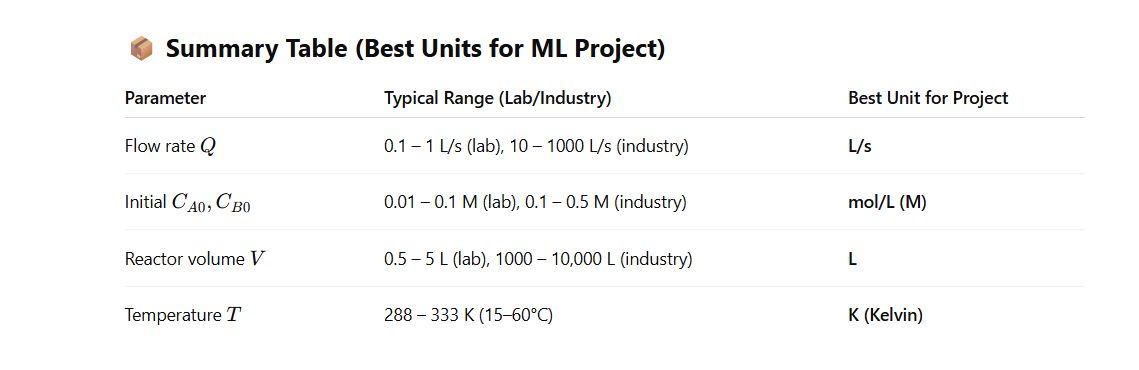

#### **Research Paper Link/Reference Link**
- <a href="file:///C:/Users/prash/OneDrive/Desktop/CHE506_Reaction_Engineering_Laboratory_C.pdf" target="_blank">CHE506 Reaction Engineering Laboratory</a>
- [CHE506 Reaction Engineering Laboratory](https://www.isca.in/rjcs/Archives/v5/i11/3.ISCA-RJCS-2015-137.pdf)

- [IJERA Research Paper](https://www.ijera.com/papers/Vol5_issue2/Part%20-%202/K502027478.pdf)

##### **Research Paper Link for k0 and Ea Values**
- [IRJET Research Paper](https://www.irjet.net/archives/V6/i3/IRJET-V6I31210.pdf?utm_source=chatgpt.com)

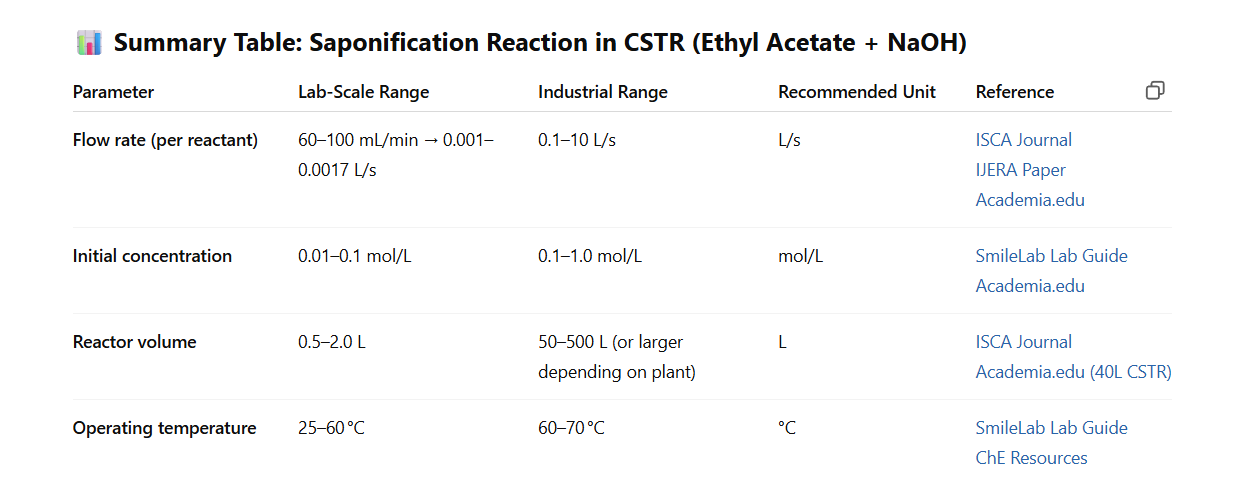

#### **1)Data set generation**

In [1]:
import numpy as np
import pandas as pd

R=8.314
Ea=29775
k0=27038

# Set the number of samples to generate
num_samples = 1000

# Generate random data within the specified ranges
np.random.seed(42)  # For reproducibility
data = {
    'Flow_Rate_EA (L/s)': np.random.uniform(0.001, 10, num_samples),
    'Flow_Rate_NaOH (L/s)': np.random.uniform(0.001, 10, num_samples),
    'Conc_EA (Mol/L)': np.random.uniform(0.01, 1, num_samples),
    'Conc_NaOH (Mol/L)': np.random.uniform(0.01, 1, num_samples),
    'Reactor_Vol (L)': np.random.uniform(0.5, 500, num_samples),
    'Temp (Kelvin)': np.random.uniform(25, 60, num_samples) + 273.15
}
# Create a DataFrame

CSTR_Data_Set = pd.DataFrame(data)

# Display the first few rows of the generated data
CSTR_Data_Set

,Flow_Rate_EA (L/s),Flow_Rate_NaOH (L/s),Conc_EA (Mol/L),Conc_NaOH (Mol/L),Reactor_Vol (L),Temp (Kelvin)
0,3.746027,1.852144,0.269089,0.675976,286.211941,311.927243
1,9.507192,5.419468,0.254509,0.798715,402.813448,314.720248
2,7.320207,8.729585,0.907192,0.257963,380.200384,328.059159
3,5.986986,7.322517,0.257051,0.628625,77.373002,310.050154
4,1.561030,8.065805,0.279230,0.576029,75.050110,328.587739
...,...,...,...,...,...,...
995,0.916729,6.569895,0.866643,0.447686,448.749961,322.105238
996,9.173218,9.566190,0.165700,0.341057,60.130815,315.762715
997,1.369049,0.690511,0.316690,0.400627,164.257498,324.930210
998,9.502423,0.571490,0.297145,0.534641,407.964818,315.135172


#### **Data preprocessing**

 **Data cleaning**
  - **Purpose**: Deletes rows with any missing values (NaN) to ensure clean, complete data for analysis or modeling.
  -  removing Outliers (for that use z-score value)
  - **Z = x−μ/σ**      x: value,μ :Mean, σ :std

  **purpose of Z-score:-**
  - It keeps only rows where all feature values are within 3 standard deviations (Z-score < 3).
  - This removes extreme outliers, which may distort machine learning models or analysis.

  **describe function**
  - it's gives insight about data set and it's statical view that help to selection of best model for given data set




In [13]:
# Data Cleaning Step
# Handle missing values
CSTR_Data_Set.dropna(inplace=True)

# Remove outliers using Z-score (optional, based on your dataset)
from scipy.stats import zscore
z_scores = CSTR_Data_Set.apply(zscore)
CSTR_Data_Set = CSTR_Data_Set[(z_scores < 3).all(axis=1)]  # Keep rows with Z-scores < 3

# Reset index after cleaning
CSTR_Data_Set.reset_index(drop=True, inplace=True)

# Display cleaned data
print("Cleaned Data Summary:")
CSTR_Data_Set

Cleaned Data Summary:


,Flow_Rate_EA (L/s),Flow_Rate_NaOH (L/s),Conc_EA (Mol/L),Conc_NaOH (Mol/L),Reactor_Vol (L),Temp (Kelvin),X_A
0,3.746027,1.852144,0.269089,0.675976,286.211941,311.927243,0.981447
1,9.507192,5.419468,0.254509,0.798715,402.813448,314.720248,0.978966
2,7.320207,8.729585,0.907192,0.257963,380.200384,328.059159,0.234284
3,5.986986,7.322517,0.257051,0.628625,77.373002,310.050154,0.853341
4,1.561030,8.065805,0.279230,0.576029,75.050110,328.587739,0.845382
...,...,...,...,...,...,...,...
995,0.916729,6.569895,0.866643,0.447686,448.749961,322.105238,0.481912
996,9.173218,9.566190,0.165700,0.341057,60.130815,315.762715,0.612704
997,1.369049,0.690511,0.316690,0.400627,164.257498,324.930210,0.917407
998,9.502423,0.571490,0.297145,0.534641,407.964818,315.135172,0.948507


#### **feature enginerring**

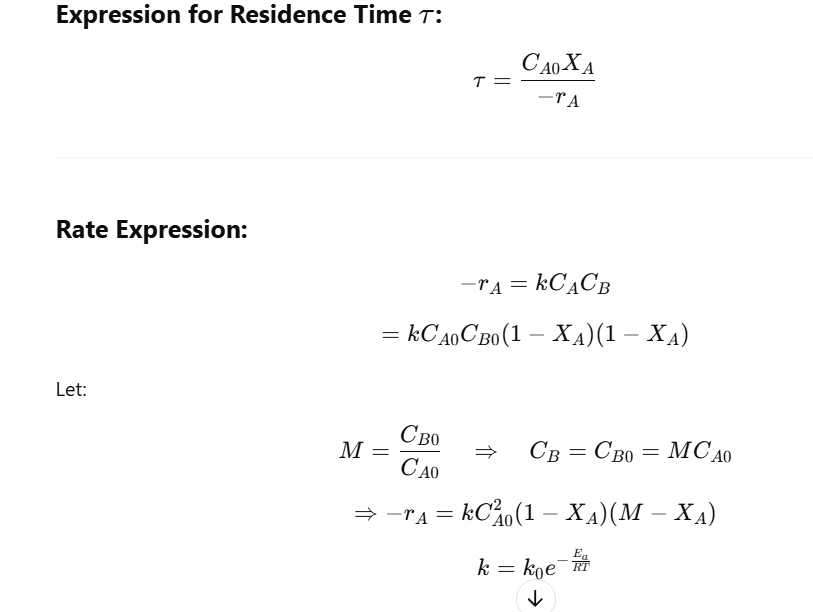
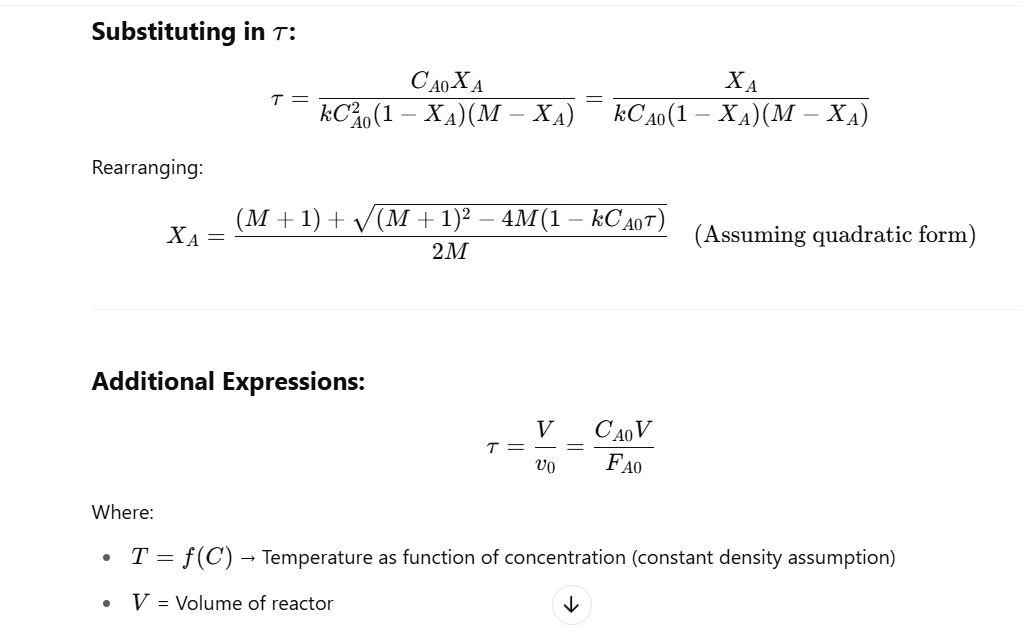

In [3]:

residence_time = CSTR_Data_Set['Reactor_Vol (L)'] / (CSTR_Data_Set['Flow_Rate_EA (L/s)'] +CSTR_Data_Set['Flow_Rate_NaOH (L/s)'])
residence_time.head()

M=CSTR_Data_Set['Conc_NaOH (Mol/L)']/CSTR_Data_Set['Conc_EA (Mol/L)']
M.head()



0    2.512094
1    3.138257
2    0.284353
3    2.445530
4    2.062916
dtype: float64

In [4]:
const_term=(1 + M + 1/(M*CSTR_Data_Set['Conc_EA (Mol/L)']*residence_time))
X_A=(const_term -np.sqrt(const_term**2 - 4*M))/2
CSTR_Data_Set['X_A'] = X_A
CSTR_Data_Set['X_A'] = CSTR_Data_Set['X_A'].clip(lower=0, upper=1)
CSTR_Data_Set['X_A'].head()

0    0.981447
1    0.978966
2    0.234284
3    0.853341
4    0.845382
Name: X_A, dtype: float64

Here is an improved and more visually appealing explanation of the purpose of shuffling the data, ensuring reproducibility, and resetting the index:

---


#### 🔄 **Shuffling the Data**
- **Purpose**: Randomizes the order of rows in the dataset.
- **Why It Matters**: 
    - Prevents any inherent bias caused by the original order of the data.
    - Ensures that machine learning models are trained on a diverse and unbiased sample of the data.
---

In [5]:

random_data_df = CSTR_Data_Set.sample(frac=1, random_state=42).reset_index(drop=True)

CSTR_Data_Set.to_csv('CSTR data set.csv', index=False)
CSTR_Data_Set

,Flow_Rate_EA (L/s),Flow_Rate_NaOH (L/s),Conc_EA (Mol/L),Conc_NaOH (Mol/L),Reactor_Vol (L),Temp (Kelvin),X_A
0,3.746027,1.852144,0.269089,0.675976,286.211941,311.927243,0.981447
1,9.507192,5.419468,0.254509,0.798715,402.813448,314.720248,0.978966
2,7.320207,8.729585,0.907192,0.257963,380.200384,328.059159,0.234284
3,5.986986,7.322517,0.257051,0.628625,77.373002,310.050154,0.853341
4,1.561030,8.065805,0.279230,0.576029,75.050110,328.587739,0.845382
...,...,...,...,...,...,...,...
995,0.916729,6.569895,0.866643,0.447686,448.749961,322.105238,0.481912
996,9.173218,9.566190,0.165700,0.341057,60.130815,315.762715,0.612704
997,1.369049,0.690511,0.316690,0.400627,164.257498,324.930210,0.917407
998,9.502423,0.571490,0.297145,0.534641,407.964818,315.135172,0.948507


#### **Exploratory Data Analysis (EDA)**
 - visualized relationships between variables using scatter plots, heatmaps, and pair plots

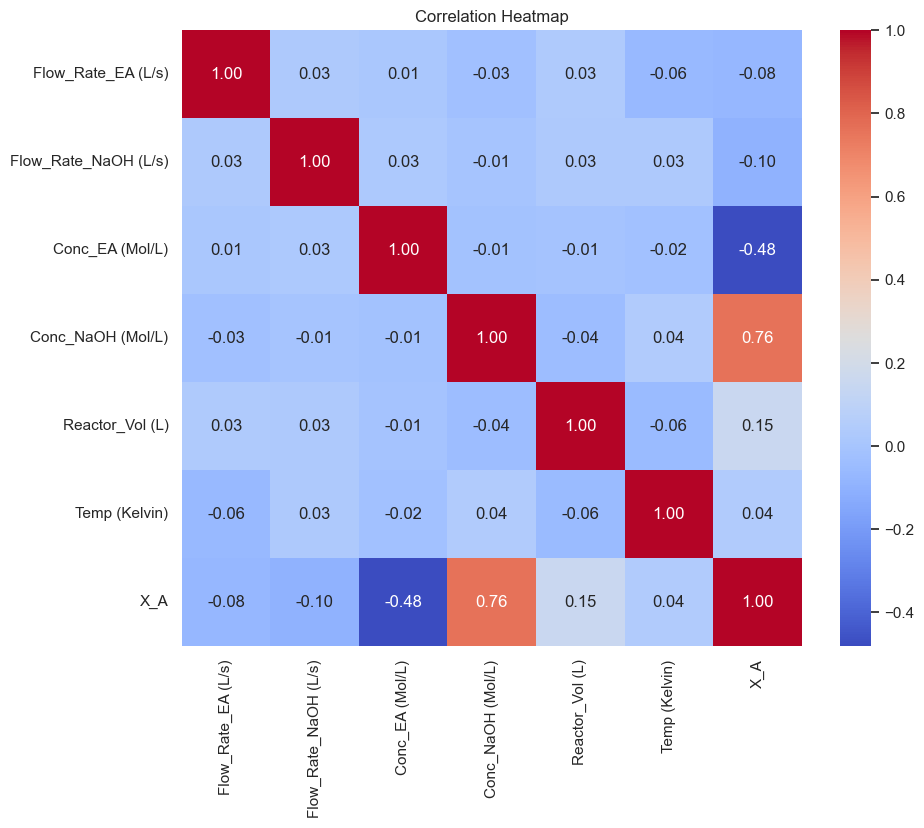

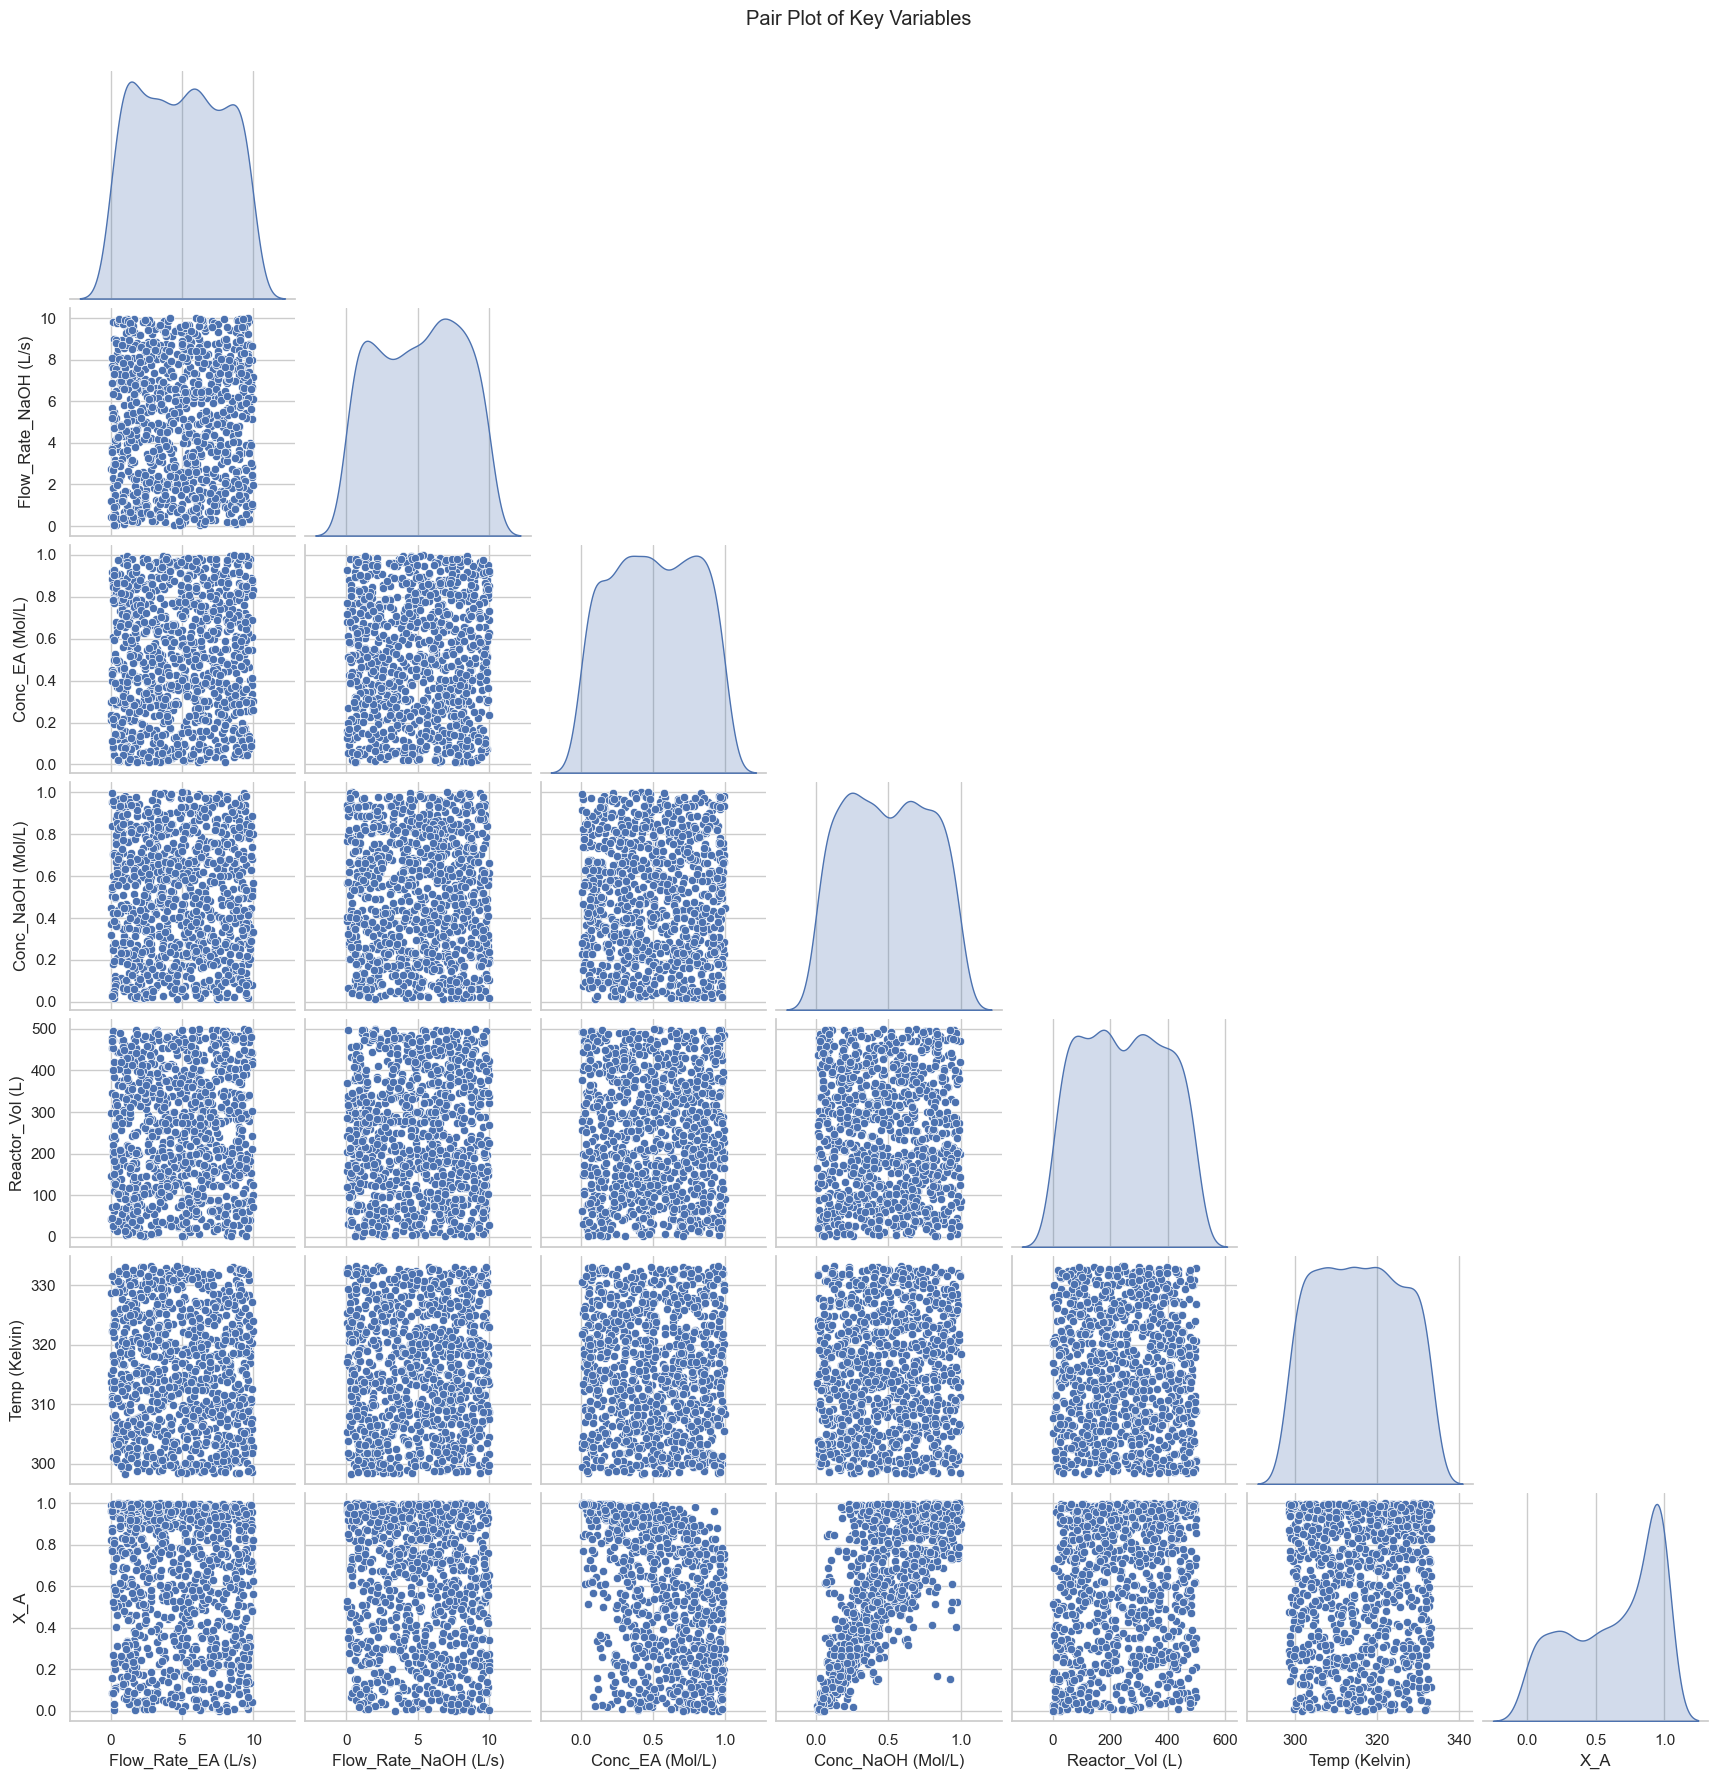

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn
sns.set(style="whitegrid")



# Heatmap: Identify correlations
plt.figure(figsize=(10, 8))
correlation_matrix = CSTR_Data_Set.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Pair Plots: Explore variable interactions
sns.pairplot(CSTR_Data_Set[['Flow_Rate_EA (L/s)', 'Flow_Rate_NaOH (L/s)', 'Conc_EA (Mol/L)', 
                            'Conc_NaOH (Mol/L)', 'Reactor_Vol (L)', 'Temp (Kelvin)', 'X_A']],
             diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Key Variables', y=1.02)
plt.show()

The insights gained from the visualization step of the dataset are as follows:

### **Insights from Visualization**
1. **Key Variables Influencing Conversion (X_A):**
    - **Concentration of NaOH (Conc_NaOH):** Strong positive correlation with conversion. Higher concentrations of NaOH lead to higher conversion rates.
    - **Reactor Volume (Reactor_Vol):** Moderate positive correlation with conversion. Larger reactor volumes provide more residence time, improving conversion.
    - **Temperature (Temp):** Weak positive correlation. Higher temperatures slightly enhance the reaction rate, leading to better conversion.

2. **Variables with Negative Influence:**
    - **Flow Rates (Flow_Rate_EA and Flow_Rate_NaOH):** Both have weak negative correlations with conversion. Higher flow rates reduce residence time, negatively impacting conversion.

3. **Patterns and Anomalies:**
    - **High Conversion:** Observed at higher NaOH concentrations, moderate flow rates, and larger reactor volumes.
    - **Low Conversion:** Detected at very high flow rates or low reactant concentrations.
    - **Outliers:** Some data points with unusually low or high conversion may indicate experimental errors or extreme operating conditions.

4. **Correlations:**
    - The heatmap revealed strong correlations between certain variables, such as Conc_NaOH and Conversion (X_A), which can guide feature selection for modeling.

---

### **How These Insights Help in the Next Steps**
1. **Feature Selection for Modeling:**
    - Focus on variables like `Conc_NaOH`, `Reactor_Vol`, and `Temp` as they have a significant impact on conversion.
    - Consider excluding or transforming variables with weak correlations to reduce noise in the model.

2. **Model Optimization:**
    - Use the insights to fine-tune hyperparameters, such as residence time and flow rates, to improve model predictions.
    - Incorporate domain knowledge to handle outliers or anomalies effectively.

3. **Predictive Modeling:**
    - Insights about variable importance can guide the choice of algorithms and feature engineering.
    - For example, Random Forest can handle non-linear relationships and interactions between variables effectively.

4. **Reactor Optimization:**
    - Use the identified key variables to suggest optimal operating conditions for maximizing conversion.
    - Simulate scenarios with adjusted flow rates, concentrations, and temperatures to predict and improve reactor performance.

5. **Validation and Refinement:**
    - Validate the model's predictions against the observed patterns in the data.
    - Refine the model by incorporating additional features or addressing anomalies.

These insights ensure that the subsequent steps, such as model training, optimization, and deployment, are data-driven and aligned with the observed trends in the dataset.

#### **Normalization  or scaling of features**

### Why Scaling is Important:
1. **Machine Learning Algorithms Sensitivity**:
    - Many ML algorithms (e.g., Gradient Descent-based models, SVMs, KNNs) are sensitive to the scale of features. Features with larger ranges can dominate the learning process, leading to biased results.
    - Scaling ensures all features contribute equally to the model.

2. **Improved Convergence**:
    - Scaling helps optimization algorithms converge faster by normalizing the feature space.

3. **Distance-Based Models**:
    - Algorithms like KNN or clustering rely on distance metrics (e.g., Euclidean distance). Without scaling, features with larger ranges can disproportionately affect the distance calculation.

4. **Regularization**:
    - Regularization techniques (e.g., L1, L2) penalize large coefficients. Without scaling, features with larger ranges can lead to incorrect penalization.

---

#### **Data splitting ,scaling ,Model selection ,Training & testing:-**

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 1: Prepare the data
X = CSTR_Data_Set[['Flow_Rate_EA (L/s)', 'Flow_Rate_NaOH (L/s)', 'Conc_EA (Mol/L)', 
                   'Conc_NaOH (Mol/L)', 'Reactor_Vol (L)', 'Temp (Kelvin)']]
y = CSTR_Data_Set['X_A']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Perform K-Fold Cross-Validation
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Define a custom scoring function (negative MSE for compatibility with cross_val_score)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=k, scoring=scorer)

# Convert negative MSE to positive
cv_scores = -cv_scores

# Print the cross-validation results
print(f"Cross-Validation Scores (MSE): {cv_scores}")
print(f"Mean MSE: {cv_scores.mean():.4f}")
print(f"Standard Deviation of MSE: {cv_scores.std():.4f}")

# Step 3: Train a machine learning model
model.fit(X_train_scaled, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Step 5: Optimize reactor performance
# Example: Predict conversion for a new set of operating conditions
new_conditions = pd.DataFrame({
    'Flow_Rate_EA (L/s)': [5],
    'Flow_Rate_NaOH (L/s)': [5],
    'Conc_EA (Mol/L)': [0.5],
    'Conc_NaOH (Mol/L)': [0.5],
    'Reactor_Vol (L)': [100],
    'Temp (Kelvin)': [320]
})

# Scale the new conditions
new_conditions_scaled = scaler.transform(new_conditions)

# Predict conversion
predicted_conversion = model.predict(new_conditions_scaled)
print(f"Predicted Conversion: {predicted_conversion[0]}")

Cross-Validation Scores (MSE): [0.0031097  0.00557851 0.00484644 0.0030535  0.00519804]
Mean MSE: 0.0044
Standard Deviation of MSE: 0.0011
Mean Squared Error: 0.0036464405900501025
R² Score: 0.9636872418485813
Predicted Conversion: 0.7108269695686035


#### **Training ,Testing and finding Error(for test set ) of data set with other models**

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Define models to train
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results[name] = {"MSE": mse, "R²": r2}

# Display the results
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  Mean Squared Error: {metrics['MSE']}")
    print(f"  R² Score: {metrics['R²']}")
    print()

# Select the best model based on R² score
best_model_name = max(results, key=lambda x: results[x]["R²"])
print(f"The best model is {best_model_name} with R² Score: {results[best_model_name]['R²']}")

Random Forest:
  Mean Squared Error: 0.0036464405900501025
  R² Score: 0.9636872418485813

Linear Regression:
  Mean Squared Error: 0.019455028364921613
  R² Score: 0.8062588098179652

Gradient Boosting:
  Mean Squared Error: 0.0029237083664786275
  R² Score: 0.9708845071802585

Support Vector Regressor:
  Mean Squared Error: 0.006925289547085514
  R² Score: 0.9310351126690347

The best model is Gradient Boosting with R² Score: 0.9708845071802585


#### **comparision of models with MSE and R^2 error:-**

C:\Users\prash\AppData\Local\Temp\ipykernel_2112\2361016653.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="MSE", y="Model", data=model_comparison_cstr, palette="viridis")
C:\Users\prash\AppData\Local\Temp\ipykernel_2112\2361016653.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="R²", y="Model", data=model_comparison_cstr, palette="viridis")


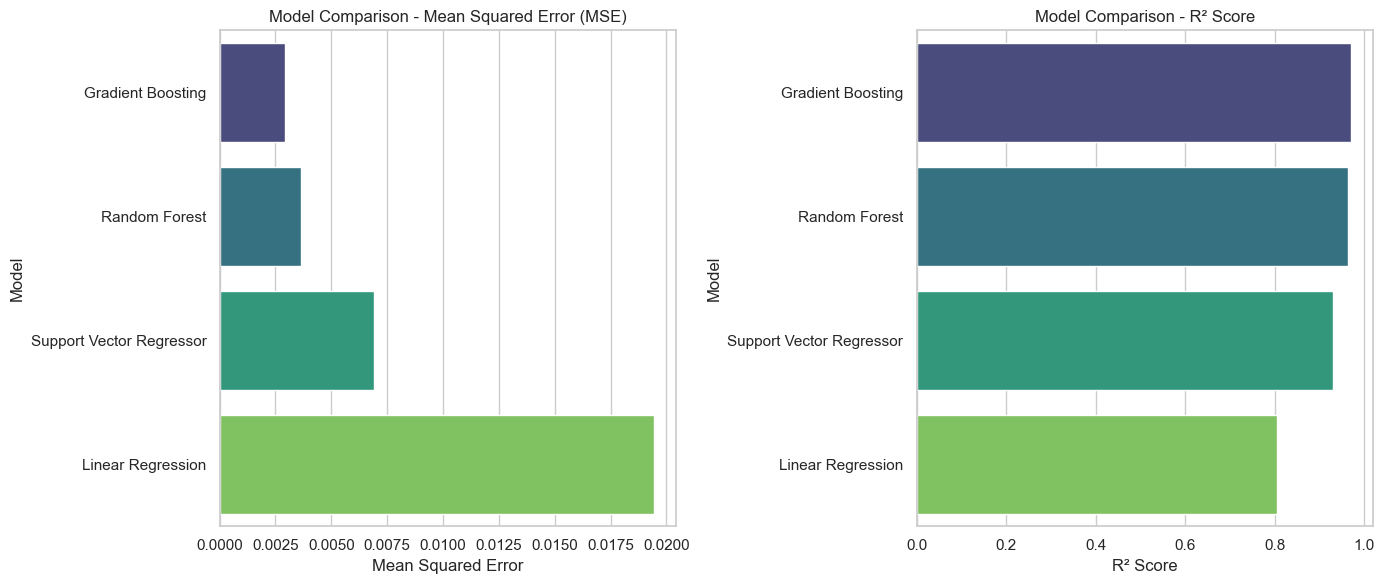

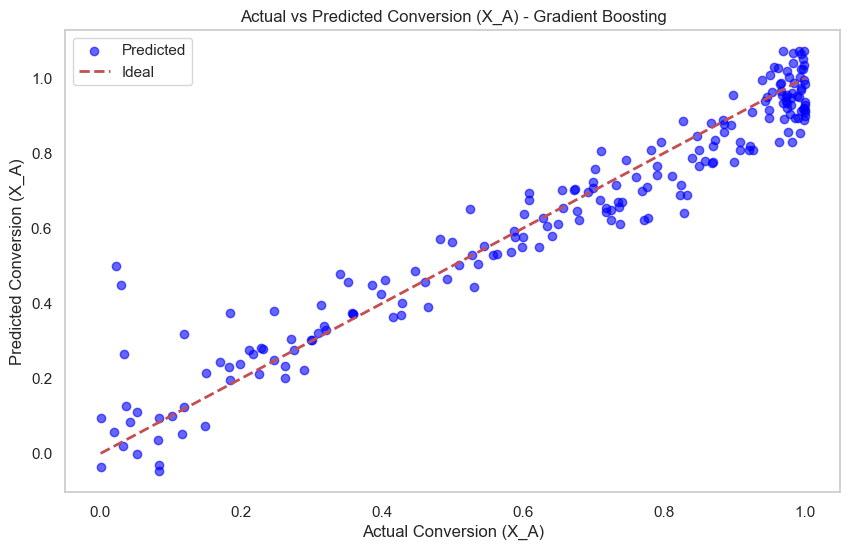

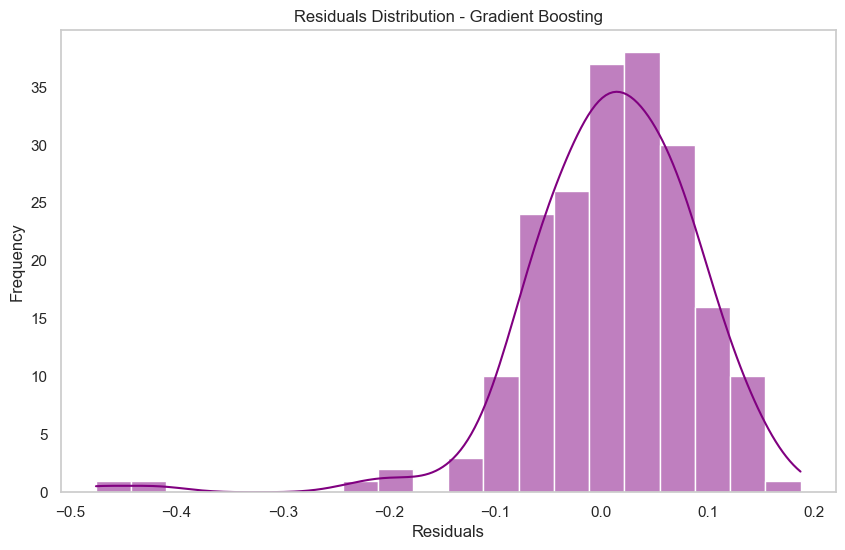

The best model is Gradient Boosting with R² = 0.9709 and MSE = 0.0029.


In [9]:
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

# Create a DataFrame to store model performance metrics
model_comparison_cstr = pd.DataFrame({
    "Model": [
        "Random Forest", "Gradient Boosting", "Support Vector Regressor", "Linear Regression"
    ],
    "MSE": [
        results["Random Forest"]["MSE"], 
        results["Gradient Boosting"]["MSE"], 
        results["Support Vector Regressor"]["MSE"], 
        results["Linear Regression"]["MSE"]
    ],
    "R²": [
        results["Random Forest"]["R²"], 
        results["Gradient Boosting"]["R²"], 
        results["Support Vector Regressor"]["R²"], 
        results["Linear Regression"]["R²"]
    ]
})

# Sort by R² for better visualization
model_comparison_cstr = model_comparison_cstr.sort_values(by="R²", ascending=False)

# Plot MSE and R² for all models
plt.figure(figsize=(14, 6))

# MSE Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(x="MSE", y="Model", data=model_comparison_cstr, palette="viridis")
plt.title("Model Comparison - Mean Squared Error (MSE)")
plt.xlabel("Mean Squared Error")
plt.ylabel("Model")

# R² Bar Plot
plt.subplot(1, 2, 2)
sns.barplot(x="R²", y="Model", data=model_comparison_cstr, palette="viridis")
plt.title("Model Comparison - R² Score")
plt.xlabel("R² Score")
plt.ylabel("Model")

plt.tight_layout()
plt.show()

# Scatter plot for Actual vs Predicted values for the best model (Gradient Boosting)
y_pred_best = model.predict(X_test_scaled)  # Assuming Gradient Boosting is the best model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, color='blue', alpha=0.6, label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal")
plt.title("Actual vs Predicted Conversion (X_A) - Gradient Boosting")
plt.xlabel("Actual Conversion (X_A)")
plt.ylabel("Predicted Conversion (X_A)")
plt.legend()
plt.grid()
plt.show()

# Residuals plot for the best model (Gradient Boosting)
residuals_best = y_test - y_pred_best
plt.figure(figsize=(10, 6))
sns.histplot(residuals_best, kde=True, color="purple", bins=20)
plt.title("Residuals Distribution - Gradient Boosting")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# Print the best model based on R²
best_model_cstr = model_comparison_cstr.iloc[0]
print(f"The best model is {best_model_cstr['Model']} with R² = {best_model_cstr['R²']:.4f} and MSE = {best_model_cstr['MSE']:.4f}.")

### **Residual Analysis**
  - Why Perform Residual Analysis?
Residual analysis is a critical step in evaluating the performance of a machine learning model. It helps you understand how well the model is predicting and whether there are any patterns or issues in the errors (residuals).

- What Are Residuals?
Residuals are the differences between the actual values (y_test) and the predicted values (y_pred_best):

- Residual = Actual Value - Predicted Value
Residuals represent the error in the model's predictions.
---

#### **1. Residuals vs Predicted Values (Scatter Plot)**

**🔍 What It Shows:**
- This plot displays the residuals (errors) on the y-axis and the predicted values on the x-axis.
- Ideally, residuals should be randomly scattered around the horizontal line at **y=0** (red dashed line), indicating no systematic bias in the model's predictions.

**📊 Observations:**
- The residuals are mostly centered around **0**, which is a positive sign of model performance.
- **Slight Pattern Detected:**
    - For **lower predicted values** (around **0.0 to 0.2**), the residuals are more spread out.
    - For **higher predicted values** (around **0.8 to 1.0**), the residuals show a slight downward trend.

**📌 Conclusion:**
- The model performs reasonably well, as the residuals are mostly random.
- However, the slight pattern in residuals for higher predicted values suggests that the model might not fully capture the relationship in this range.
- **Next Steps:** Consider additional feature engineering or exploring a more complex model to address these cases.

---

#### **2. Residuals Distribution (Histogram)**

**🔍 What It Shows:**
- This plot illustrates the distribution of residuals (errors).
- Ideally, residuals should follow a **normal distribution** (bell-shaped curve) centered around **0**, indicating unbiased errors.

**📊 Observations:**
- The residuals are approximately **normally distributed**, with most residuals close to **0**.
- **Outliers Detected:**
    - A few residuals are observed at the extremes (e.g., around **-0.4** and **0.2**).

**📌 Conclusion:**
- The residual distribution is good overall, indicating that the model's errors are unbiased.
- The presence of a few outliers suggests that the model struggles with certain data points.
- **Next Steps:** Investigate the outliers to identify potential data issues or areas where the model could be improved.

---

By analyzing these residual plots, we gain valuable insights into the model's performance and areas for potential improvement. 🎯

In [10]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

# Use the best model
best_CSTR_model = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best R² Score: 0.9591176526634619


#### **Search for optimum feature**

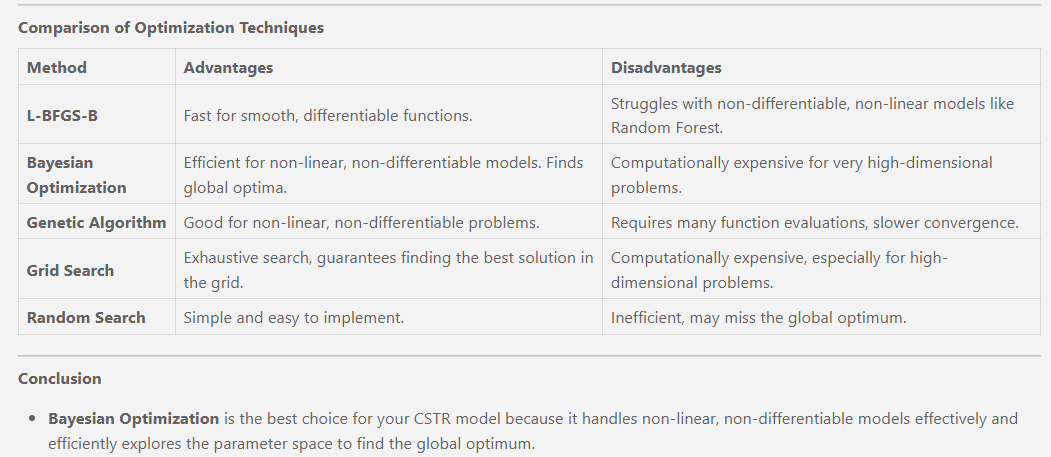

In [11]:
import joblib

# Save the model
joblib.dump(best_CSTR_model, 'best_CSTR_model.pkl')

# Load the model
# loaded_model = joblib.load('best_CSTR_model.pkl')

# Predict using the loaded model
# new_prediction = loaded_model.predict(new_conditions_scaled)
# print("Predicted Conversion:", new_prediction[0])

['best_CSTR_model.pkl']

In [12]:
# ...existing code...

from bayes_opt import BayesianOptimization
import numpy as np

# Define the objective function for Bayesian Optimization
def objective_function(flow_rate_ea, flow_rate_naoh, conc_ea, conc_naoh, reactor_vol, temp):
    input_data = pd.DataFrame({
        'Flow_Rate_EA (L/s)': [flow_rate_ea],
        'Flow_Rate_NaOH (L/s)': [flow_rate_naoh],
        'Conc_EA (Mol/L)': [conc_ea],
        'Conc_NaOH (Mol/L)': [conc_naoh],
        'Reactor_Vol (L)': [reactor_vol],
        'Temp (Kelvin)': [temp]
    })
    # Scale the input using the same scaler as training
    input_scaled = scaler.transform(input_data)
    # Predict conversion using the best model
    predicted_conversion = best_CSTR_model.predict(input_scaled)
    return float(predicted_conversion[0])

# Define the bounds for the decision variables
pbounds = {
    'flow_rate_ea': (CSTR_Data_Set['Flow_Rate_EA (L/s)'].min(), CSTR_Data_Set['Flow_Rate_EA (L/s)'].max()),
    'flow_rate_naoh': (CSTR_Data_Set['Flow_Rate_NaOH (L/s)'].min(), CSTR_Data_Set['Flow_Rate_NaOH (L/s)'].max()),
    'conc_ea': (CSTR_Data_Set['Conc_EA (Mol/L)'].min(), CSTR_Data_Set['Conc_EA (Mol/L)'].max()),
    'conc_naoh': (CSTR_Data_Set['Conc_NaOH (Mol/L)'].min(), CSTR_Data_Set['Conc_NaOH (Mol/L)'].max()),
    'reactor_vol': (CSTR_Data_Set['Reactor_Vol (L)'].min(), CSTR_Data_Set['Reactor_Vol (L)'].max()),
    'temp': (CSTR_Data_Set['Temp (Kelvin)'].min(), CSTR_Data_Set['Temp (Kelvin)'].max())
}

# Initialize the Bayesian Optimizer
optimizer = BayesianOptimization(
    f=objective_function,
    pbounds=pbounds,
    random_state=42
)

# Perform the optimization
optimizer.maximize(
    init_points=10,  # Number of random initial points
    n_iter=50        # Number of iterations for optimization
)

# Extract the optimal conditions
optimal_conditions = optimizer.max['params']
optimal_conversion = optimizer.max['target']

print("Optimal Conditions:")
print(f"Flow Rate EA (L/s): {optimal_conditions['flow_rate_ea']:.4f}")
print(f"Flow Rate NaOH (L/s): {optimal_conditions['flow_rate_naoh']:.4f}")
print(f"Concentration EA (Mol/L): {optimal_conditions['conc_ea']:.4f}")
print(f"Concentration NaOH (Mol/L): {optimal_conditions['conc_naoh']:.4f}")
print(f"Reactor Volume (L): {optimal_conditions['reactor_vol']:.4f}")
print(f"Temperature (Kelvin): {optimal_conditions['temp']:.4f}")
print(f"Maximum Predicted Conversion: {optimal_conversion:.4f}")

# ...existing code...

|   iter    |  target   |  conc_ea  | conc_naoh | flow_r... | flow_r... | reacto... |   temp    |
-------------------------------------------------------------------------------------------------
| 1         | 0.8486    | 0.38      | 0.9508    | 7.331     | 5.996     | 78.27     | 303.8     |
| 2         | 0.7328    | 0.06739   | 0.8672    | 6.028     | 7.086     | 10.77     | 332.1     |
| 3         | 0.1842    | 0.8323    | 0.2206    | 1.856     | 1.86      | 152.1     | 316.6     |
| 4         | 0.5157    | 0.4367    | 0.2986    | 6.135     | 1.423     | 146.1     | 311.1     |
| 5         | 0.9509    | 0.4605    | 0.7871    | 2.034     | 5.155     | 295.8     | 300.0     |
| 6         | 0.2419    | 0.6102    | 0.1793    | 0.6946    | 9.485     | 481.7     | 326.5     |
| 7         | 0.1933    | 0.3109    | 0.1072    | 6.855     | 4.418     | 61.33     | 315.6     |
| 8         | 0.9905    | 0.04398   | 0.9099    | 2.622     | 6.633     | 155.9     | 316.4     |
| 9         | 0.2856